In [ ]:
from google.colab import drive
from bs4 import BeautifulSoup
import re

drive.mount('/content/drive/')
!sudo apt install poppler-utils
!pdftotext -r 150 -bbox /content/drive/MyDrive/ast_sci_data_tables_sample.pdf datatable_example.html

# Read HTML content
html_file = 'datatable_example.html'
with open(html_file, 'r') as f:
    html_content = f.read()

# Parse HTML using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')


# List to store page word data
pages_word_data_list = []
pages = soup.find_all('page')

# Tolerance for yMin and yMax comparison
y_tolerance = 5

for page_number, page in enumerate(pages, start=1):
    # Dictionary to group words by their yMin and yMax values
    lines_dict = {}

    words = page.find_all('word')
    for word in words:
        x_min = float(word['xmin'])
        x_max = float(word['xmax'])
        y_min = float(word['ymin'])
        y_max = float(word['ymax'])
        word_text = word.get_text().strip()

        # Adjust yMin and yMax by tolerance
        y_min_key = round(y_min / y_tolerance) * y_tolerance
        y_max_key = round(y_max / y_tolerance) * y_tolerance

        line_key = (y_min_key, y_max_key)

        if line_key not in lines_dict:
            lines_dict[line_key] = {
                'words': [],
                'bounding_box': {
                    'xMin': x_min,
                    'xMax': x_max,
                    'yMin': y_min_key,
                    'yMax': y_max_key
                }
            }

        lines_dict[line_key]['words'].append(word_text)
        lines_dict[line_key]['bounding_box']['xMin'] = min(lines_dict[line_key]['bounding_box']['xMin'], x_min)
        lines_dict[line_key]['bounding_box']['xMax'] = max(lines_dict[line_key]['bounding_box']['xMax'], x_max)

    page_lines_data = []
    for (y_min, y_max), line_data in lines_dict.items():
        line_text = ' '.join(line_data['words'])
        line_data_formatted = {
            'line_text': line_text,
            'bounding_box': {
                'xMin': line_data['bounding_box']['xMin'],
                'xMax': line_data['bounding_box']['xMax'],
                'yMin': y_min,
                'yMax': y_max
            }
        }
        page_lines_data.append(line_data_formatted)

    pages_word_data_list.append([page_number, page_lines_data])

# Process each page to create list of linewise words with adjusted bounding boxes
Pdftotext_result = []
for page_number, page_lines_data in pages_word_data_list:
    page_result = []
    for line_data in page_lines_data:
        # Split line text by spaces and commas
        line_words = re.split(r'[,\s]+', line_data['line_text'])
        line_words_with_bbox = {
            'words': line_words,
            'bounding_box': line_data['bounding_box']
        }
        page_result.append(line_words_with_bbox)
    Pdftotext_result.append([page_number, page_result])

# Print the result
for page_number, page_result in Pdftotext_result:
    print(f"Page {page_number}:")
    for line_data in page_result:
        print(line_data)


Mounted at /content/drive/
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Fetched 186 kB in 0s (1,056 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.


In [ ]:
pages_word_data_list = []
pages = soup.find_all('page')

for page_number, page in enumerate(pages, start=1):
    page_word_data = []
    words = page.find_all('word')

    for word in words:
        x_min = float(word['xmin'])
        x_max = float(word['xmax'])
        y_min = float(word['ymin'])
        y_max = float(word['ymax'])
        word_text = word.get_text().strip()

        word_data = {
            'word_text': word_text,
            'bounding_box': {
                'xMin': x_min,
                'xMax': x_max,
                'yMin': y_min,
                'yMax': y_max
            }
        }

        page_word_data.append(word_data)
    pages_word_data_list.append([page_number, page_word_data])

for page_number, page_word_data in pages_word_data_list:
    print(f"Page {page_number}:")
    for word_data in page_word_data:
        print(word_data)

# xMin': 251.5775, 'xMax': 755.382542, 'yMin': 800, 'yMax': 825
# {'word_text': 'Coils', 'bounding_box': {'xMin': 381.160833, 'xMax': 436.723333, 'yMin': 799.106542, 'yMax': 824.273208}}

Page 1:
{'word_text': 'NATIONAL', 'bounding_box': {'xMin': 114.583333, 'xMax': 233.919463, 'yMin': 107.106521, 'yMax': 134.789854}}
{'word_text': 'PARTNERSHIP', 'bounding_box': {'xMin': 239.941957, 'xMax': 402.074918, 'yMin': 107.106521, 'yMax': 134.789854}}
{'word_text': 'FOR', 'bounding_box': {'xMin': 408.097412, 'xMax': 454.132365, 'yMin': 107.106521, 'yMax': 134.789854}}
{'word_text': 'QUALITY', 'bounding_box': {'xMin': 460.154859, 'xMax': 561.011007, 'yMin': 107.106521, 'yMax': 134.789854}}
{'word_text': 'AFTERSCHOOL', 'bounding_box': {'xMin': 567.033501, 'xMax': 730.610211, 'yMin': 107.106521, 'yMax': 134.789854}}
{'word_text': 'LEARNING', 'bounding_box': {'xMin': 736.632705, 'xMax': 855.308835, 'yMin': 107.106521, 'yMax': 134.789854}}
{'word_text': 'www.sedl.org/afterschool/toolkits', 'bounding_box': {'xMin': 112.5, 'xMax': 500.341667, 'yMin': 134.189854, 'yMax': 161.850271}}
{'word_text': '�����������', 'bounding_box': {'xMin': 113.541779, 'xMax': 327.571171, 'yMin': 177.876878

# Read table with table transformer

In [ ]:
!pip install transformers
# Install Tesseract-OCR version 5.4.1
!apt-get update
!apt-get install -y wget lsb-release software-properties-common
!add-apt-repository -y ppa:alex-p/tesseract-ocr-devel
!apt-get update
!apt-get install -y tesseract-ocr=5.4.1-1ppa1~$(lsb_release -sc)1
!apt-get install -y libtesseract-dev

# Install pytesseract
!pip install pytesseract

# Verify installation
!tesseract --version
!sudo apt-get install -y poppler-utils
!pip install pdf2image
!pip install timm
!sudo apt install libtesseract-dev

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,420 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:14 http://archive.ubuntu.com/u

In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr
!apt-get install -y tesseract-ocr-eng

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/alex-p/tesseract-ocr-devel/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubunt

In [ ]:
import pytesseract
from pdf2image import pdfinfo_from_path
import transformers
import cv2
import timm
import subprocess
import pdf2image


# Print versions of other modules
print("pytesseract version:", pytesseract.__version__)
# print("easyocr version:", easyocr.__version__)
print("transformers version:", transformers.__version__)
print("cv2 version:", cv2.__version__)
print("timm version:", timm.__version__)

# Check Tesseract OCR version
tesseract_version = subprocess.check_output(["tesseract", "--version"])
print("Tesseract version:", tesseract_version.decode("utf-8").split('\n')[0])

pytesseract version: 0.3.10
transformers version: 4.42.4
cv2 version: 4.8.0
timm version: 1.0.7
Tesseract version: tesseract 5.4.1


In [ ]:
from transformers import AutoImageProcessor, TableTransformerForObjectDetection
import torch
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from pdf2image import convert_from_path
from tqdm.auto import tqdm
import pytesseract


In [ ]:
from pdf2image import convert_from_path

def pdf_to_img(pdf_path):
    # Convert all pages of the PDF to a list of images
    images = convert_from_path(pdf_path, fmt='jpeg')
    return images

pdf_path = '/content/drive/MyDrive/ast_sci_data_tables_sample.pdf'
images = pdf_to_img(pdf_path)

print(images)

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1700x2200 at 0x7BB1128A3190>, <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1700x2200 at 0x7BB1128D6B30>]


In [ ]:
model_name = "microsoft/table-transformer-detection"
image_processor = AutoImageProcessor.from_pretrained(model_name)
model = TableTransformerForObjectDetection.from_pretrained(model_name,revision="no_timm")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


config.json:   0%|          | 0.00/76.5k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

In [ ]:
def detect_table(image_doc):
    results = []

    for image in image_doc:
        inputs = image_processor(images=image, return_tensors="pt")
        outputs = model(**inputs)

        # convert outputs (bounding boxes and class logits) to Pascal VOC format (xmin, ymin, xmax, ymax)
        target_sizes = torch.tensor([image.size[::-1]])
        page_results = image_processor.post_process_object_detection(outputs,threshold=0.9,target_sizes=target_sizes)
        results.append({"image" : image ,"Result" : page_results})
    return results

table_results = detect_table(images)

for i, result in enumerate(table_results):
    print(f"Results for page {i + 1}:")
    print(result)

Results for page 1:
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1700x2200 at 0x7BB1128A3190>, 'Result': [{'scores': tensor([0.9998], grad_fn=<IndexBackward0>), 'labels': tensor([0]), 'boxes': tensor([[ 343.1806, 1070.3160, 1010.3323, 1305.4126]],
       grad_fn=<IndexBackward0>)}]}
Results for page 2:
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1700x2200 at 0x7BB1128D6B30>, 'Result': [{'scores': tensor([0.9997, 0.9991], grad_fn=<IndexBackward0>), 'labels': tensor([0, 0]), 'boxes': tensor([[ 179.8397,  552.0806, 1512.8790, 1313.0441],
        [ 381.2167, 1650.7555, 1038.6146, 1934.2559]],
       grad_fn=<IndexBackward0>)}]}


In [ ]:
from transformers import TableTransformerForObjectDetection
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-structure-recognition")

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def get_table_bbox(results, label_map):

    tables_coordinates = []

    for page_idx, page_results in enumerate(results):
        image = page_results["image"]
        for detection in page_results["Result"]:
            boxes = detection["boxes"]
            scores = detection["scores"]
            labels = detection["labels"]

            for score, label, box in zip(scores, labels, boxes):
                if score >= 0.9:  # Only consider detections with high confidence
                    # Convert box coordinates to integer and ensure Pascal VOC format
                    xmin, ymin, xmax, ymax = [round(i, 2) for i in box.tolist()]

                    table_dict = {
                        "page": page_idx + 1,
                        "label": label_map.get(label.item(), "Unknown"),
                        "confidence": round(score.item(), 3),
                        "xmin": xmin,
                        "ymin": ymin,
                        "xmax": xmax,
                        "ymax": ymax
                    }

                    tables_coordinates.append(table_dict)

                    # Print prediction label, confidence score, and bbox values
                    print(
                        f"Page {page_idx + 1}: Detected {label_map.get(label.item(), 'Unknown')} with confidence "
                        f"{table_dict['confidence']} at location (xmin: {xmin}, ymin: {ymin}, xmax: {xmax}, ymax: {ymax})"
                    )
    return tables_coordinates

label_map = {0: 'table'}

table_bbox = get_table_bbox(table_results, label_map)
print(table_bbox)

Page 1: Detected table with confidence 1.0 at location (xmin: 343.18, ymin: 1070.32, xmax: 1010.33, ymax: 1305.41)
Page 2: Detected table with confidence 1.0 at location (xmin: 179.84, ymin: 552.08, xmax: 1512.88, ymax: 1313.04)
Page 2: Detected table with confidence 0.999 at location (xmin: 381.22, ymin: 1650.76, xmax: 1038.61, ymax: 1934.26)
[{'page': 1, 'label': 'table', 'confidence': 1.0, 'xmin': 343.18, 'ymin': 1070.32, 'xmax': 1010.33, 'ymax': 1305.41}, {'page': 2, 'label': 'table', 'confidence': 1.0, 'xmin': 179.84, 'ymin': 552.08, 'xmax': 1512.88, 'ymax': 1313.04}, {'page': 2, 'label': 'table', 'confidence': 0.999, 'xmin': 381.22, 'ymin': 1650.76, 'xmax': 1038.61, 'ymax': 1934.26}]


In [ ]:
from PIL import Image

def get_cropped_images(image, table_bbox, padding):
    cropped_images = []

    if not table_bbox:
        print("No tables detected in the image.")
        return cropped_images

    for table in table_bbox:
        left = max(table["xmin"] - padding, 0)
        top = max(table["ymin"] - padding, 0)
        right = min(table["xmax"] + padding, image.width)
        bottom = min(table["ymax"] + padding, image.height)

        cropped_image = image.crop((left, top, right, bottom))
        cropped_images.append(cropped_image)

    return cropped_images

# Example padding value
padding = 15
all_cropped_images = []

for i, image in enumerate(images):
    table_boxes = [bbox for bbox in table_bbox if bbox["page"] == i + 1]

    cropped_images = get_cropped_images(image, table_boxes, padding)
    all_cropped_images.extend(cropped_images)

# Display the first cropped image
if all_cropped_images:
    print(all_cropped_images[0])
else:
    print("No tables were detected in the images.")

#all_cropped_images[2]

<PIL.Image.Image image mode=RGB size=697x265 at 0x7BB1135704F0>


In [ ]:
structure_model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-structure-recognition-v1.1-all")

config.json:   0%|          | 0.00/76.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

In [ ]:
def get_table_features(cropped_image):
    # Preprocess image input for the table structure model
    inputs = image_processor(images=cropped_image, return_tensors="pt")

    # Make prediction using the table structure model
    with torch.no_grad():
        outputs = structure_model(**inputs)

    # Post-process output to get bounding box format in Pascal VOC
    target_sizes = torch.tensor([cropped_image.size[::-1]])

    results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

    # List to store detected features
    features = []

    # Iterate through all detected features
    for i, (score, label, box) in enumerate(zip(results["scores"], results["labels"], results["boxes"])):
        # Convert the box tensor to a list of rounded floats
        box = [round(coord, 2) for coord in box.tolist()]
        score = score.item()
        label = structure_model.config.id2label[label.item()]

        # Create a dictionary for each detected feature
        feature_dict = {
            "label": label,
            "score": score,
            "bbox": box
        }

        # Append to the features list
        features.append(feature_dict)

        # Print detected features
       # print(f"Detected {label} with confidence {round(score, 3)} at location {box}")

    return features

In [ ]:
# Dictionary to store features for each table
tables_features = {}

# Check if there are any cropped images
if all_cropped_images:
    # Loop over each cropped image
    for idx, cropped_image in enumerate(all_cropped_images):
        # Extract features for the current cropped image
        features = get_table_features(cropped_image)

        # Store the features in the dictionary with an index key
        tables_features[idx] = {


            "image": cropped_image,
            "features": features
        }
else:
    print("No cropped images available to extract features.")

# Output the features of each table
for table_id, data in tables_features.items():
    print(f"Features for {table_id}:")
    for feature in data["features"]:
        print(feature)

Features for 0:
{'label': 'table row', 'score': 0.9929350018501282, 'bbox': [6.37, 51.13, 678.51, 103.3]}
{'label': 'table column', 'score': 0.9998754262924194, 'bbox': [298.32, 10.1, 678.79, 246.09]}
{'label': 'table column header', 'score': 0.9934205412864685, 'bbox': [6.56, 10.1, 678.46, 51.19]}
{'label': 'table row', 'score': 0.9972299933433533, 'bbox': [6.55, 103.36, 678.57, 153.51]}
{'label': 'table row', 'score': 0.9988917708396912, 'bbox': [6.25, 153.09, 678.68, 203.79]}
{'label': 'table', 'score': 0.9998735189437866, 'bbox': [6.55, 9.81, 678.45, 245.88]}
{'label': 'table row', 'score': 0.9991456270217896, 'bbox': [6.48, 203.99, 678.65, 245.61]}
{'label': 'table column', 'score': 0.9997952580451965, 'bbox': [6.36, 10.09, 296.45, 246.12]}
{'label': 'table row', 'score': 0.996749758720398, 'bbox': [6.5, 10.14, 678.49, 51.2]}
Features for 1:
{'label': 'table column', 'score': 0.9999809265136719, 'bbox': [256.11, 12.82, 552.05, 769.24]}
{'label': 'table row', 'score': 0.99990725517

In [ ]:
def get_cell_coordinates_by_row(table_data):
    # Extract rows and columns
    rows = [entry for entry in table_data if entry['label'] == 'table row']
    columns = [entry for entry in table_data if entry['label'] == 'table column']

    # Sort rows and columns by their Y and X coordinates, respectively
    rows.sort(key=lambda x: x['bbox'][1])
    columns.sort(key=lambda x: x['bbox'][0])

    # Initialize cell coordinates list
    cell_coordinates = []

    # Generate cell coordinates for each row
    for row in rows:
        row_cells = []
        for column in columns:
            # Calculate cell bounding box
            cell_bbox = [column['bbox'][0], row['bbox'][1], column['bbox'][2], row['bbox'][3]]
            row_cells.append({'cell': cell_bbox})
        cell_coordinates.append({'cells': row_cells, 'cell_count': len(row_cells)})

    return cell_coordinates

all_table_coordinates = []
for table_id, data in tables_features.items():
    table_coordinates = get_cell_coordinates_by_row(data["features"])
    all_table_coordinates.append({"ID": table_id, "Coordinates":table_coordinates})

for table_coordinate in all_table_coordinates:
    print(table_coordinate['ID'], table_coordinate['Coordinates'])


















# {'word_text': 'Number', 'bounding_box': {'xMin': 13.08099030821137, 'xMax': 133.26996668616414, 'yMin': 16.999999999999886, 'yMax': 38.0}}
# {'word_text': 'of', 'bounding_box': {'xMin': 142.23284675815518, 'xMax': 172.037121223847, 'yMin': 16.999999999999886, 'yMax': 38.0}}
# {'word_text': 'Coils', 'bounding_box': {'xMin': 181.0, 'xMax': 253.00000000000006, 'yMin': 16.999999999999886, 'yMax': 38.0}}

# {'word_text': 'Number', 'bounding_box': {'xMin': 341.9712134623173, 'xMax': 462.16018984027, 'yMin': 16.999999999999886, 'yMax': 38.0}}
# {'word_text': 'of', 'bounding_box': {'xMin': 471.12306861642304, 'xMax': 500.9273430821149, 'yMin': 16.999999999999886, 'yMax': 38.0}}
# {'word_text': 'Paperclips', 'bounding_box': {'xMin': 509.89022315410585, 'xMax': 665.9307185241846, 'yMin': 16.999999999999886, 'yMax': 38.0}}

# {'word_text': '5', 'bounding_box': {'xMin': 96.44762269516309, 'xMax': 113.61747646344202, 'yMin': 48.639056440769764, 'yMax': 69.62167261249476}}

# {'word_text': '3,', 'bounding_box': {'xMin': 431.90069784476947, 'xMax': 458.76234057142864, 'yMin': 48.639056440769764, 'yMax': 69.62167261249476}}
# {'word_text': '5,', 'bounding_box': {'xMin': 467.9951864656918, 'xMax': 494.85682789651304, 'yMin': 48.639056440769764, 'yMax': 69.62167261249476}}
# {'word_text': '4', 'bounding_box': {'xMin': 504.0626775973005, 'xMax': 521.2325313655795, 'yMin': 48.639056440769764, 'yMax': 69.62167261249476}}

# {'word_text': '10', 'bounding_box': {'xMin': 79.43318785151848, 'xMax': 113.63791312485932, 'yMin': 80.27812957028175, 'yMax': 101.26074657644381}}

# {'word_text': '7,', 'bounding_box': {'xMin': 432.6160807739033, 'xMax': 459.4777235005626, 'yMin': 80.27812957028175, 'yMax': 101.26074657644381}}
# {'word_text': '8,', 'bounding_box': {'xMin': 468.71056939482577, 'xMax': 495.57221212148494, 'yMin': 80.27812957028175, 'yMax': 101.26074657644381}}
# {'word_text': '6', 'bounding_box': {'xMin': 504.8050580157481, 'xMax': 521.9749117840272, 'yMin': 80.27812957028175, 'yMax': 101.26074657644381}}

# {'word_text': '15', 'bounding_box': {'xMin': 79.43318785151848, 'xMax': 113.63791312485932, 'yMin': 111.91720353423091, 'yMax': 132.8998197059558}}

# {'word_text': '11,', 'bounding_box': {'xMin': 431.7791858177729, 'xMax': 475.6756987536559, 'yMin': 111.91720353423091, 'yMax': 132.8998197059558}}
# {'word_text': '10,', 'bounding_box': {'xMin': 484.88154845444325, 'xMax': 528.7780613903262, 'yMin': 111.91720353423091, 'yMax': 132.8998197059558}}
# {'word_text': '12', 'bounding_box': {'xMin': 537.9839097952756, 'xMax': 572.1886350686166, 'yMin': 111.91720353423091, 'yMax': 132.8998197059558}}

# {'word_text': '20', 'bounding_box': {'xMin': 79.43318785151848, 'xMax': 113.63791312485932, 'yMin': 143.55629418692206, 'yMax': 164.53891119308412}}

# {'word_text': '15,', 'bounding_box': {'xMin': 431.7791858177729, 'xMax': 475.6756987536559, 'yMin': 143.55629418692206, 'yMax': 164.53891119308412}}
# {'word_text': '13,', 'bounding_box': {'xMin': 484.88154845444325, 'xMax': 528.7780613903262, 'yMin': 143.55629418692206, 'yMax': 164.53891119308412}}
# {'word_text': '14', 'bounding_box': {'xMin': 537.9839097952756, 'xMax': 572.1886350686166, 'yMin': 143.55629418692206, 'yMax': 164.53891119308412}}

0 [{'cells': [{'cell': [6.36, 10.14, 296.45, 51.2]}, {'cell': [298.32, 10.14, 678.79, 51.2]}], 'cell_count': 2}, {'cells': [{'cell': [6.36, 51.13, 296.45, 103.3]}, {'cell': [298.32, 51.13, 678.79, 103.3]}], 'cell_count': 2}, {'cells': [{'cell': [6.36, 103.36, 296.45, 153.51]}, {'cell': [298.32, 103.36, 678.79, 153.51]}], 'cell_count': 2}, {'cells': [{'cell': [6.36, 153.09, 296.45, 203.79]}, {'cell': [298.32, 153.09, 678.79, 203.79]}], 'cell_count': 2}, {'cells': [{'cell': [6.36, 203.99, 296.45, 245.61]}, {'cell': [298.32, 203.99, 678.79, 245.61]}], 'cell_count': 2}]
1 [{'cells': [{'cell': [15.1, 12.69, 254.13, 59.67]}, {'cell': [256.11, 12.69, 552.05, 59.67]}, {'cell': [552.79, 12.69, 977.51, 59.67]}, {'cell': [976.24, 12.69, 1186.24, 59.67]}, {'cell': [1187.01, 12.69, 1349.2, 59.67]}], 'cell_count': 5}, {'cells': [{'cell': [15.1, 59.85, 254.13, 120.36]}, {'cell': [256.11, 59.85, 552.05, 120.36]}, {'cell': [552.79, 59.85, 977.51, 120.36]}, {'cell': [976.24, 59.85, 1186.24, 120.36]}, {'

Cropped Image 1


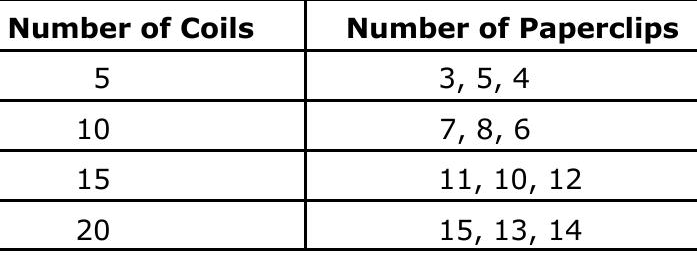

Cropped Image 2


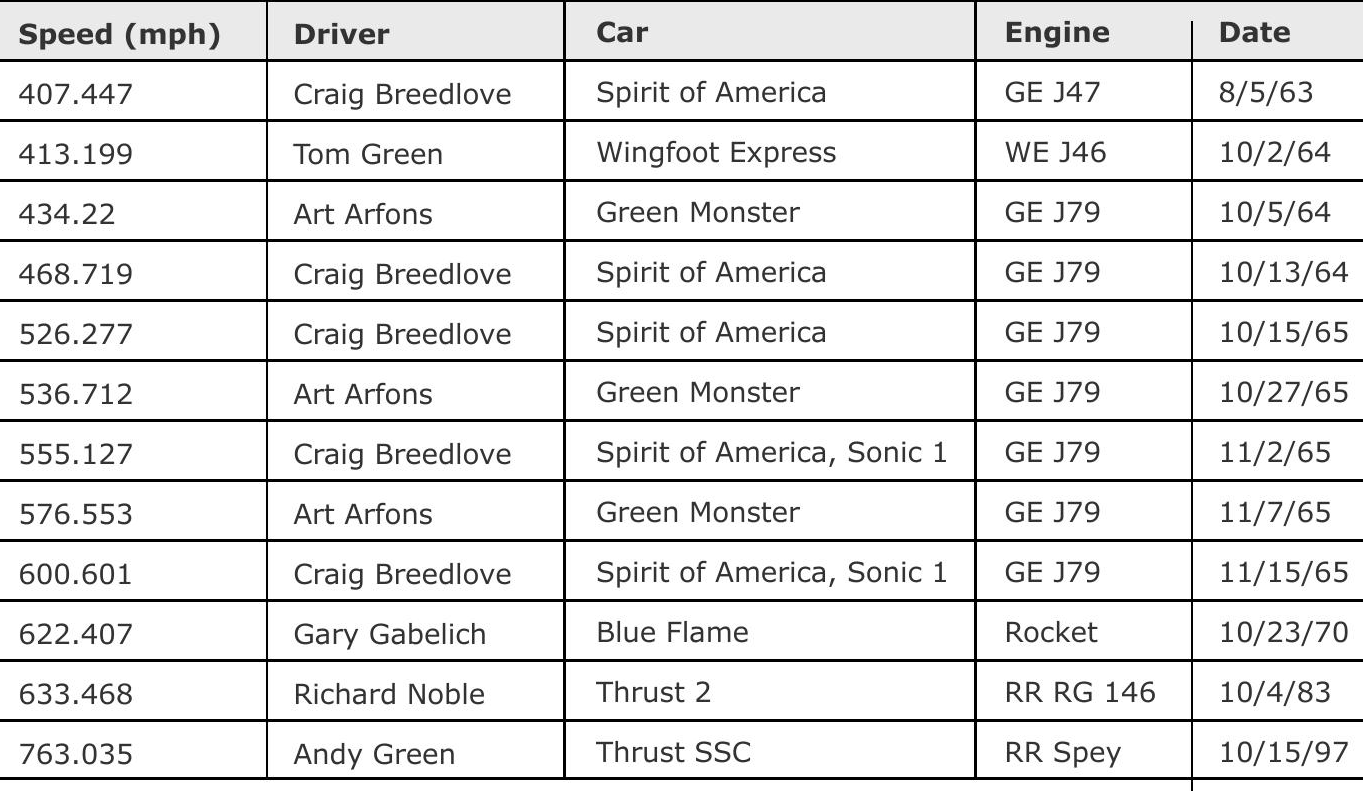

Cropped Image 3


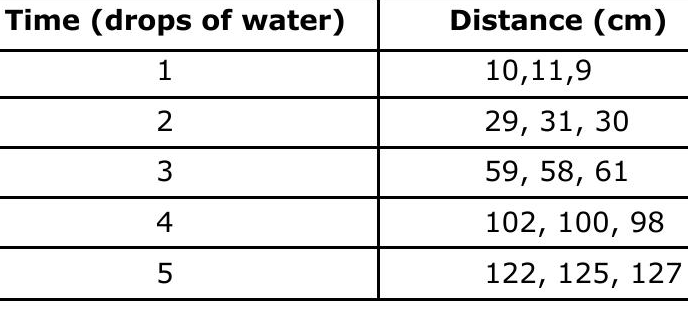

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np

# Convert PIL image to OpenCV format for visualization
def pil_to_cv2(pil_image):
    return cv2.cvtColor(np.array(pil_image), cv2.COLOR_RGB2BGR)

# Display all cropped images
for idx, cropped_image in enumerate(all_cropped_images):
    print(f"Cropped Image {idx + 1}")
    cv2_imshow(pil_to_cv2(cropped_image))

In [ ]:
def apply_ocr(cell_coordinates, cropped_image):
    # let's OCR row by row
    data = dict()
    max_num_columns = 0
    for idx, row in enumerate(tqdm(cell_coordinates)):
        row_text = []
        for cell in row["cells"]:
            # crop cell out of image
            cell_image = np.array(cropped_image.crop(cell["cell"]))

            # apply OCR using PyTesseract
            text = pytesseract.image_to_string(cell_image, lang='eng', config='--psm 6').strip()
            if text:
                row_text.append(text)


        if len(row_text) > max_num_columns:
            max_num_columns = len(row_text)

        data[idx] = row_text

    print("Max number of columns:", max_num_columns)

    # pad rows which don't have max_num_columns elements
    for row, row_data in data.copy().items():
        if len(row_data) != max_num_columns:
            row_data = row_data + ["" for _ in range(max_num_columns - len(row_data))]
        data[row] = row_data
        print(row_data)

    return data


final_all_tables = []
for table_coordinate in (tqdm(all_table_coordinates)):
    final_all_tables.append(apply_ocr(table_coordinate['Coordinates'], all_cropped_images[table_coordinate['ID']]))

print(final_all_tables)
print(final_all_tables[0][0])

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Max number of columns: 2
['Number of Coils', 'Number of Paperclips']
['5', '3,5,4']
['10', '7, 8,6']
['15', '11, 10, 12']
['20', '| 15, 13, 14']


  0%|          | 0/13 [00:00<?, ?it/s]

Max number of columns: 5
['Speed (mph)', 'Driver', 'Car', 'Engine', 'Date']
['407.447', 'Craig Breedlove', 'Spirit of America', 'GE J47', '8/5/63']
['413.199', 'Tom Green', 'Wingfoot Express', 'WE J46', '10/2/64']
['434.22', 'Art Arfons', 'Green Monster', 'GE J79', '10/5/64']
['468.719', 'Craig Breedlove', 'Spirit of America', 'GE J79', '10/13/64']
['526.2//', 'Craig Breedlove', 'Spirit of America', 'GE J79', '10/15/65']
['536.712', 'Art Arfons', 'Green Monster', 'GE J79', '10/27/65']
['555.127', 'Craig Breedlove', 'Spirit of America, Sonic 1', 'GE J79', '11/2/65']
['576.553', 'Art Arfons', 'Green Monster', 'GE J79', '11/7/65']
['600.601', 'Craig Breedlove', 'Spirit of America, Sonic 1', 'GE J79', '11/15/65']
['622.407', 'Gary Gabelich', 'Blue Flame', 'Rocket', '10/23/70']
['633.468', 'Richard Noble', 'Thrust 2', 'RR RG 146', '10/4/83']
['763.035', 'Andy Green', '| Thrust SSC', '| RR Spey', '| 10/15/97']


  0%|          | 0/6 [00:00<?, ?it/s]

Max number of columns: 2
['Time (drops of water) |', 'Distance (cm)']
['rr rn 0', '10,11,9']
['a ae |', '29, 31, 30']
['BY', '59, 58, 61']
['a ne |', '102, 100, 98']
['5', '122, 125, 127']
[{0: ['Number of Coils', 'Number of Paperclips'], 1: ['5', '3,5,4'], 2: ['10', '7, 8,6'], 3: ['15', '11, 10, 12'], 4: ['20', '| 15, 13, 14']}, {0: ['Speed (mph)', 'Driver', 'Car', 'Engine', 'Date'], 1: ['407.447', 'Craig Breedlove', 'Spirit of America', 'GE J47', '8/5/63'], 2: ['413.199', 'Tom Green', 'Wingfoot Express', 'WE J46', '10/2/64'], 3: ['434.22', 'Art Arfons', 'Green Monster', 'GE J79', '10/5/64'], 4: ['468.719', 'Craig Breedlove', 'Spirit of America', 'GE J79', '10/13/64'], 5: ['526.2//', 'Craig Breedlove', 'Spirit of America', 'GE J79', '10/15/65'], 6: ['536.712', 'Art Arfons', 'Green Monster', 'GE J79', '10/27/65'], 7: ['555.127', 'Craig Breedlove', 'Spirit of America, Sonic 1', 'GE J79', '11/2/65'], 8: ['576.553', 'Art Arfons', 'Green Monster', 'GE J79', '11/7/65'], 9: ['600.601', 'Crai

  0%|          | 0/3 [00:00<?, ?it/s]

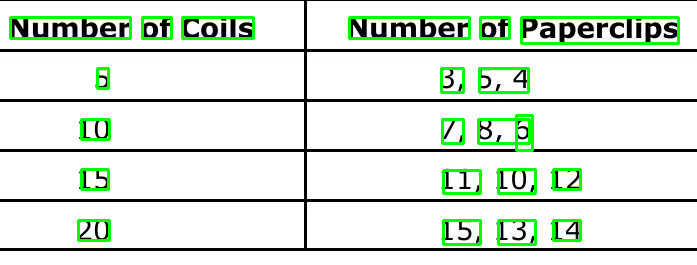

 33%|███▎      | 1/3 [00:00<00:00,  2.49it/s]

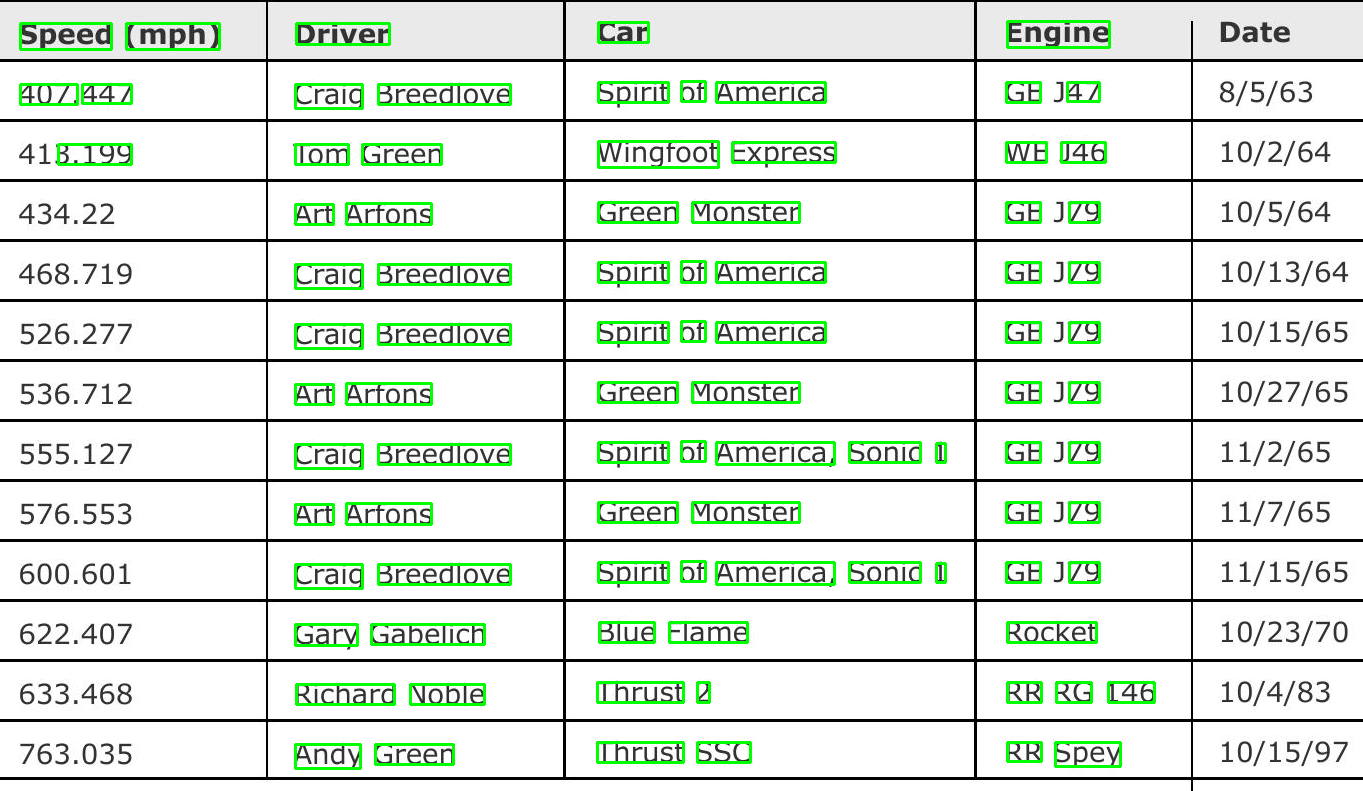

 67%|██████▋   | 2/3 [00:01<00:01,  1.05s/it]

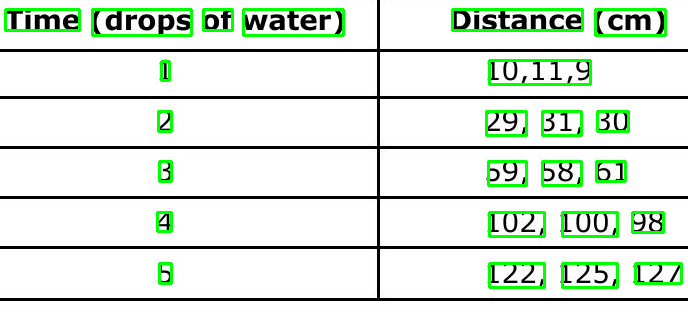

100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

Image ID: 0
Word: Number, Bounding Box: (10, 17, 130, 38)
Word: of, Bounding Box: (142, 17, 171, 38)
Word: Coils, Bounding Box: (182, 17, 253, 38)
Word: Number, Bounding Box: (349, 17, 469, 38)
Word: of, Bounding Box: (480, 17, 509, 38)
Word: Paperclips, Bounding Box: (521, 17, 678, 43)
Word: 5, Bounding Box: (97, 68, 108, 88)
Word: 3,, Bounding Box: (441, 68, 463, 92)
Word: 5,4, Bounding Box: (479, 68, 528, 92)
Word: 10, Bounding Box: (81, 119, 109, 139)
Word: 7,, Bounding Box: (442, 119, 463, 143)
Word: 8,, Bounding Box: (478, 119, 529, 143)
Word: 6, Bounding Box: (516, 115, 532, 150)
Word: 15, Bounding Box: (81, 169, 108, 189)
Word: 11,, Bounding Box: (443, 170, 480, 193)
Word: 10,, Bounding Box: (498, 169, 535, 193)
Word: 12, Bounding Box: (553, 169, 580, 189)
Word: 20, Bounding Box: (78, 220, 109, 240)
Word: 15,, Bounding Box: (443, 220, 480, 244)
Word: 13,, Bounding Box: (498, 220, 535, 244)
Word: 14, Bounding Box: (553, 220, 580, 240)
Image ID: 1
Word: Speed, Bounding Box: (20, 

In [ ]:
import pytesseract
from pytesseract import Output
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

def estimate_contrast_brightness(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate mean and standard deviation
    mean = np.mean(gray)
    stddev = np.std(gray)

    # Dynamic contrast and brightness adjustment
    contrast = stddev / 55  # Scale factor to adjust contrast, you may need to tune this value
    brightness = mean / 255  # Scale brightness to range [0, 1]

    return contrast, brightness

def apply_ocr_and_draw_bboxes(image):
    image.save('/content/temp_image.png')
    img = cv2.imread('/content/temp_image.png')

    # Estimate dynamic contrast and brightness
    contrast, brightness = estimate_contrast_brightness(img)

    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Adjust contrast and brightness dynamically
    alpha = max(1.0, contrast)  # Ensure alpha is at least 1.0
    beta = int(brightness * 100)  # Scale brightness to range [0, 100]
    adjusted = cv2.convertScaleAbs(gray, alpha=alpha, beta=beta)

    # Apply median blur to reduce noise
    blurred = cv2.medianBlur(adjusted, 3)

    # Apply binary thresholding
    _, binary = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Perform OCR on the processed image
    d = pytesseract.image_to_data(binary, output_type=Output.DICT)
    n_boxes = len(d['level'])

    for i in range(n_boxes):
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        if d['text'][i].strip():
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2_imshow(img)

    bboxes_with_words = []
    for i in range(len(d['text'])):
        if d['text'][i].strip():
            bbox = (d['left'][i], d['top'][i], d['width'][i] + d['left'][i], d['height'][i] + d['top'][i])
            word = d['text'][i]
            bboxes_with_words.append((bbox, word))

    return bboxes_with_words

# Processing all tables
final_all_tables_bboxes = []



for table_coordinate in tqdm(all_table_coordinates):
    image_id = table_coordinate['ID']
    cropped_image = all_cropped_images[image_id]

    bboxes_with_words = apply_ocr_and_draw_bboxes(cropped_image)
    final_all_tables_bboxes.append({
        'image_id': image_id,
        'bboxes_with_words': bboxes_with_words
    })

# Output results
for table in final_all_tables_bboxes:
    print(f"Image ID: {table['image_id']}")
    for bbox, word in table['bboxes_with_words']:
        print(f"Word: {word}, Bounding Box: {bbox}")

print("Bounding boxes for the first image:")
print(final_all_tables_bboxes[0]['bboxes_with_words'])


In [ ]:
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from tqdm import tqdm

def estimate_contrast_brightness(image):
    image = np.array(image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean = np.mean(gray)
    stddev = np.std(gray)
    contrast = stddev / 55
    brightness = mean / 255
    return contrast, brightness

def apply_ocr_and_draw_bboxes(cell_coordinates, cropped_image):
    contrast, brightness = estimate_contrast_brightness(cropped_image)
    cropped_image = np.array(cropped_image)
    gray = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
    alpha = max(1.0, contrast)
    beta = int(brightness * 100)
    adjusted = cv2.convertScaleAbs(gray, alpha=alpha, beta=beta)
    blurred = cv2.medianBlur(adjusted, 3)
    _, binary = cv2.threshold(blurred, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    d = pytesseract.image_to_data(binary, output_type=Output.DICT)
    n_boxes = len(d['level'])

    bboxes_with_words = []
    for i in range(n_boxes):
        if d['text'][i].strip():
            bbox = {
                'xmin': d['left'][i],
                'ymin': d['top'][i],
                'xmax': d['left'][i] + d['width'][i],
                'ymax': d['top'][i] + d['height'][i]
            }
            word = d['text'][i]
            bboxes_with_words.append((bbox, word))

    return bboxes_with_words

def process_all_tables(all_table_coordinates, all_cropped_images):
    final_table_bounding_boxes = []

    for table_idx, table_coordinate in tqdm(enumerate(all_table_coordinates), total=len(all_table_coordinates)):
        cropped_image = all_cropped_images[table_coordinate['ID']]
        bboxes_with_words = apply_ocr_and_draw_bboxes(table_coordinate['Coordinates'], cropped_image)

        table_data = []
        for row_idx, row in enumerate(table_coordinate['Coordinates']):
            row_data = []
            for cell in row['cells']:
                cell_xmin, cell_ymin, cell_xmax, cell_ymax = cell['cell']
                cell_words = [
                    {'word': word, 'bbox': bbox}
                    for bbox, word in bboxes_with_words
                    if (bbox['xmin'] >= cell_xmin - 5 and bbox['xmax'] <= cell_xmax + 5 and
                        bbox['ymin'] >= cell_ymin - 5 and bbox['ymax'] <= cell_ymax + 5)
                ]
                if not cell_words:
                    row_data.append({'word': '', 'bbox': None})
                else:
                    row_data.extend(cell_words)
            table_data.append(row_data)
        final_table_bounding_boxes.append({'table_no': table_idx + 1, 'data': table_data})

    return final_table_bounding_boxes

final_table_bounding_boxes = process_all_tables(all_table_coordinates, all_cropped_images)
for table in final_table_bounding_boxes:
    print(f"Table {table['table_no']}:")
    for row in table['data']:
        print(row)



# {'word_text': 'Number', 'bounding_box': {'xMin': 13.08099030821137, 'xMax': 133.26996668616414, 'yMin': 16.999999999999886, 'yMax': 38.0}}
# {'word_text': 'of', 'bounding_box': {'xMin': 142.23284675815518, 'xMax': 172.037121223847, 'yMin': 16.999999999999886, 'yMax': 38.0}}
# {'word_text': 'Coils', 'bounding_box': {'xMin': 181.0, 'xMax': 253.00000000000006, 'yMin': 16.999999999999886, 'yMax': 38.0}}
# {'word_text': 'Number', 'bounding_box': {'xMin': 341.9712134623173, 'xMax': 462.16018984027, 'yMin': 16.999999999999886, 'yMax': 38.0}}
# {'word_text': 'of', 'bounding_box': {'xMin': 471.12306861642304, 'xMax': 500.9273430821149, 'yMin': 16.999999999999886, 'yMax': 38.0}}
# {'word_text': 'Paperclips', 'bounding_box': {'xMin': 509.89022315410585, 'xMax': 665.9307185241846, 'yMin': 16.999999999999886, 'yMax': 38.0}}

100%|██████████| 3/3 [00:05<00:00,  1.73s/it]

Table 1:
[{'word': 'Number', 'bbox': {'xmin': 10, 'ymin': 17, 'xmax': 130, 'ymax': 38}}, {'word': 'of', 'bbox': {'xmin': 142, 'ymin': 17, 'xmax': 171, 'ymax': 38}}, {'word': 'Coils', 'bbox': {'xmin': 182, 'ymin': 17, 'xmax': 253, 'ymax': 38}}, {'word': 'Number', 'bbox': {'xmin': 349, 'ymin': 17, 'xmax': 469, 'ymax': 38}}, {'word': 'of', 'bbox': {'xmin': 480, 'ymin': 17, 'xmax': 509, 'ymax': 38}}, {'word': 'Paperclips', 'bbox': {'xmin': 521, 'ymin': 17, 'xmax': 678, 'ymax': 43}}]
[{'word': '5', 'bbox': {'xmin': 97, 'ymin': 68, 'xmax': 108, 'ymax': 88}}, {'word': '3,', 'bbox': {'xmin': 441, 'ymin': 68, 'xmax': 463, 'ymax': 92}}, {'word': '5,4', 'bbox': {'xmin': 479, 'ymin': 68, 'xmax': 528, 'ymax': 92}}]
[{'word': '10', 'bbox': {'xmin': 81, 'ymin': 119, 'xmax': 109, 'ymax': 139}}, {'word': '7,', 'bbox': {'xmin': 442, 'ymin': 119, 'xmax': 463, 'ymax': 143}}, {'word': '8,', 'bbox': {'xmin': 478, 'ymin': 119, 'xmax': 529, 'ymax': 143}}, {'word': '6', 'bbox': {'xmin': 516, 'ymin': 115, 'xmax

In [ ]:
def apply_ocr(cell_coordinates, cropped_image):
    data = dict()
    max_num_columns = 0

    d = pytesseract.image_to_data(cropped_image, lang='eng', config='--psm 3', output_type=pytesseract.Output.DICT)

    rows_data = {i: [] for i in range(len(cell_coordinates))}

    for i in range(len(d['text'])):
        if d['text'][i].strip():
            xmin = d['left'][i]
            ymin = d['top'][i]
            xmax = xmin + d['width'][i]
            ymax = ymin + d['height'][i]

            word_box = {
                'word': d['text'][i],
                'xmin': xmin,
                'ymin': ymin,
                'xmax': xmax,
                'ymax': ymax
            }

            for row_idx, row in enumerate(cell_coordinates):
                for cell in row["cells"]:
                    cell_xmin, cell_ymin, cell_xmax, cell_ymax = cell["cell"]
                    if (xmin >= cell_xmin-5 and xmax <= cell_xmax+5 and
                        ymin >= cell_ymin-5 and ymax <= cell_ymax+5):
                        rows_data[row_idx].append(word_box)
                        break

    for idx, row_boxes in rows_data.items():
        if len(row_boxes) > max_num_columns:
            max_num_columns = len(row_boxes)
        data[idx] = row_boxes

    print("Max number of columns:", max_num_columns)

    # Pad rows which don't have max_num_columns elements
    for row, row_data in data.copy().items():
        if len(row_data) != max_num_columns:
            row_data = row_data + [{} for _ in range(max_num_columns - len(row_data))]
        data[row] = row_data
        print(row_data)

    return data

# Processing all tables
final_table_bounding_boxes = []

for table_coordinate in tqdm(all_table_coordinates):
    cropped_image = all_cropped_images[table_coordinate['ID']]
    bboxes_with_words = apply_ocr(table_coordinate['Coordinates'], cropped_image)
    final_table_bounding_boxes.append(bboxes_with_words)


# {'word_text': 'Number', 'bounding_box': {'xMin': 13.08099030821137, 'xMax': 133.26996668616414, 'yMin': 16.999999999999886, 'yMax': 38.0}}
# {'word_text': 'of', 'bounding_box': {'xMin': 142.23284675815518, 'xMax': 172.037121223847, 'yMin': 16.999999999999886, 'yMax': 38.0}}
# {'word_text': 'Coils', 'bounding_box': {'xMin': 181.0, 'xMax': 253.00000000000006, 'yMin': 16.999999999999886, 'yMax': 38.0}}
# {'word_text': 'Number', 'bounding_box': {'xMin': 341.9712134623173, 'xMax': 462.16018984027, 'yMin': 16.999999999999886, 'yMax': 38.0}}
# {'word_text': 'of', 'bounding_box': {'xMin': 471.12306861642304, 'xMax': 500.9273430821149, 'yMin': 16.999999999999886, 'yMax': 38.0}}
# {'word_text': 'Paperclips', 'bounding_box': {'xMin': 509.89022315410585, 'xMax': 665.9307185241846, 'yMin': 16.999999999999886, 'yMax': 38.0}}

 33%|███▎      | 1/3 [00:00<00:01,  1.36it/s]

Max number of columns: 6
[{'word': 'Number', 'xmin': 10, 'ymin': 17, 'xmax': 131, 'ymax': 38}, {'word': 'of', 'xmin': 141, 'ymin': 17, 'xmax': 171, 'ymax': 38}, {'word': 'Coils', 'xmin': 181, 'ymin': 17, 'xmax': 253, 'ymax': 38}, {'word': 'Number', 'xmin': 348, 'ymin': 17, 'xmax': 469, 'ymax': 38}, {'word': 'of', 'xmin': 480, 'ymin': 17, 'xmax': 510, 'ymax': 38}, {'word': 'Paperclips', 'xmin': 521, 'ymin': 17, 'xmax': 678, 'ymax': 44}]
[{'word': '5', 'xmin': 96, 'ymin': 68, 'xmax': 109, 'ymax': 88}, {'word': '3,', 'xmin': 441, 'ymin': 67, 'xmax': 463, 'ymax': 93}, {'word': '5,4', 'xmin': 478, 'ymin': 68, 'xmax': 529, 'ymax': 93}, {}, {}, {}]
[{'word': '10', 'xmin': 79, 'ymin': 118, 'xmax': 109, 'ymax': 139}, {'word': '7,8,', 'xmin': 441, 'ymin': 118, 'xmax': 501, 'ymax': 144}, {'word': '6', 'xmin': 515, 'ymin': 118, 'xmax': 529, 'ymax': 139}, {}, {}, {}]
[{'word': '15', 'xmin': 79, 'ymin': 169, 'xmax': 109, 'ymax': 189}, {'word': '11,', 'xmin': 442, 'ymin': 169, 'xmax': 481, 'ymax': 19

 67%|██████▋   | 2/3 [00:05<00:03,  3.02s/it]

Max number of columns: 11
[{'word': 'Speed', 'xmin': 20, 'ymin': 23, 'xmax': 111, 'ymax': 50}, {'word': '(mph)', 'xmin': 126, 'ymin': 23, 'xmax': 219, 'ymax': 50}, {'word': 'Driver', 'xmin': 296, 'ymin': 23, 'xmax': 389, 'ymax': 44}, {'word': 'Car', 'xmin': 597, 'ymin': 21, 'xmax': 648, 'ymax': 42}, {'word': 'Engine', 'xmin': 1007, 'ymin': 21, 'xmax': 1109, 'ymax': 48}, {'word': 'Date', 'xmin': 1221, 'ymin': 22, 'xmax': 1290, 'ymax': 42}, {}, {}, {}, {}, {}]
[{'word': '407.447', 'xmin': 19, 'ymin': 84, 'xmax': 132, 'ymax': 104}, {'word': 'Craig', 'xmin': 295, 'ymin': 83, 'xmax': 363, 'ymax': 110}, {'word': 'Breedlove', 'xmin': 377, 'ymin': 83, 'xmax': 510, 'ymax': 104}, {'word': 'Spirit', 'xmin': 598, 'ymin': 82, 'xmax': 669, 'ymax': 108}, {'word': 'of', 'xmin': 681, 'ymin': 81, 'xmax': 706, 'ymax': 102}, {'word': 'America', 'xmin': 716, 'ymin': 82, 'xmax': 825, 'ymax': 102}, {'word': 'GE', 'xmin': 1006, 'ymin': 81, 'xmax': 1042, 'ymax': 102}, {'word': 'J47', 'xmin': 1054, 'ymin': 82, 

100%|██████████| 3/3 [00:06<00:00,  2.19s/it]

Max number of columns: 6
[{'word': 'Time', 'xmin': 5, 'ymin': 9, 'xmax': 79, 'ymax': 30}, {'word': '(drops', 'xmin': 92, 'ymin': 9, 'xmax': 191, 'ymax': 36}, {'word': 'of', 'xmin': 202, 'ymin': 9, 'xmax': 232, 'ymax': 30}, {'word': 'water)', 'xmin': 242, 'ymin': 9, 'xmax': 343, 'ymax': 36}, {'word': 'Distance', 'xmin': 452, 'ymin': 9, 'xmax': 582, 'ymax': 30}, {'word': '(cm)', 'xmin': 595, 'ymin': 9, 'xmax': 665, 'ymax': 36}]
[{'word': '10,11,9', 'xmin': 488, 'ymin': 59, 'xmax': 591, 'ymax': 85}, {}, {}, {}, {}, {}]
[{'word': '29,', 'xmin': 486, 'ymin': 110, 'xmax': 527, 'ymax': 136}, {'word': '31,', 'xmin': 541, 'ymin': 110, 'xmax': 582, 'ymax': 136}, {'word': '30', 'xmin': 596, 'ymin': 110, 'xmax': 628, 'ymax': 131}, {}, {}, {}]
[{'word': '59,', 'xmin': 487, 'ymin': 160, 'xmax': 527, 'ymax': 186}, {'word': '58,', 'xmin': 541, 'ymin': 160, 'xmax': 582, 'ymax': 186}, {'word': '61', 'xmin': 596, 'ymin': 160, 'xmax': 627, 'ymax': 181}, {}, {}, {}]
[{'word': '102,', 'xmin': 488, 'ymin': 2

In [ ]:
# NORMAL APPROACH


# import pytesseract
# from pytesseract import Output
# from google.colab.patches import cv2_imshow
# import cv2
# from PIL import Image
# import numpy as np

# # Read the image using OpenCV
# img = cv2.imread('/content/drive/MyDrive/temp.png')

# # Convert the image to PIL format
# pil_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# # Save the image as TIFF format
# tiff_path = '/content/temp.tiff'
# pil_img.save(tiff_path)

# # Read the TIFF image using OpenCV
# tiff_img = cv2.imread(tiff_path)

# # Perform OCR using PyTesseract
# custom_config = r'--oem 3 --psm 3'
# d = pytesseract.image_to_data(tiff_img, output_type=Output.DICT, config=custom_config)

# n_boxes = len(d['level'])

# for i in range(n_boxes):
#     (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])

#     if d['text'][i].strip():
#         cv2.rectangle(tiff_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
#         print(f"Word: {d['text'][i]}")
#         print(f"Bounding Box: (x: {x}, y: {y}, w: {w}, h: {h})")

# cv2_imshow(tiff_img)

Word: Speed
Bounding Box: (x: 20, y: 23, w: 91, h: 27)
Word: (mph)
Bounding Box: (x: 126, y: 23, w: 93, h: 27)
Word: 407.447
Bounding Box: (x: 19, y: 84, w: 113, h: 20)
Word: 413.199
Bounding Box: (x: 19, y: 143, w: 112, h: 21)
Word: 434.22
Bounding Box: (x: 19, y: 203, w: 95, h: 21)
Word: 468.719
Bounding Box: (x: 19, y: 263, w: 112, h: 21)
Word: 526.277
Bounding Box: (x: 21, y: 323, w: 111, h: 21)
Word: 536.712
Bounding Box: (x: 21, y: 383, w: 111, h: 21)
Word: §55.12/
Bounding Box: (x: 21, y: 443, w: 111, h: 21)
Word: 576.553
Bounding Box: (x: 21, y: 503, w: 110, h: 21)
Word: 600.601
Bounding Box: (x: 20, y: 563, w: 110, h: 21)
Word: 622.407
Bounding Box: (x: 20, y: 623, w: 112, h: 21)
Word: 633.468
Bounding Box: (x: 20, y: 683, w: 112, h: 21)
Word: 763.035
Bounding Box: (x: 20, y: 743, w: 111, h: 21)
Word: Driver
Bounding Box: (x: 296, y: 23, w: 93, h: 21)
Word: Craig
Bounding Box: (x: 295, y: 83, w: 68, h: 27)
Word: Breedlove
Bounding Box: (x: 377, y: 83, w: 133, h: 21)
Word: Tom


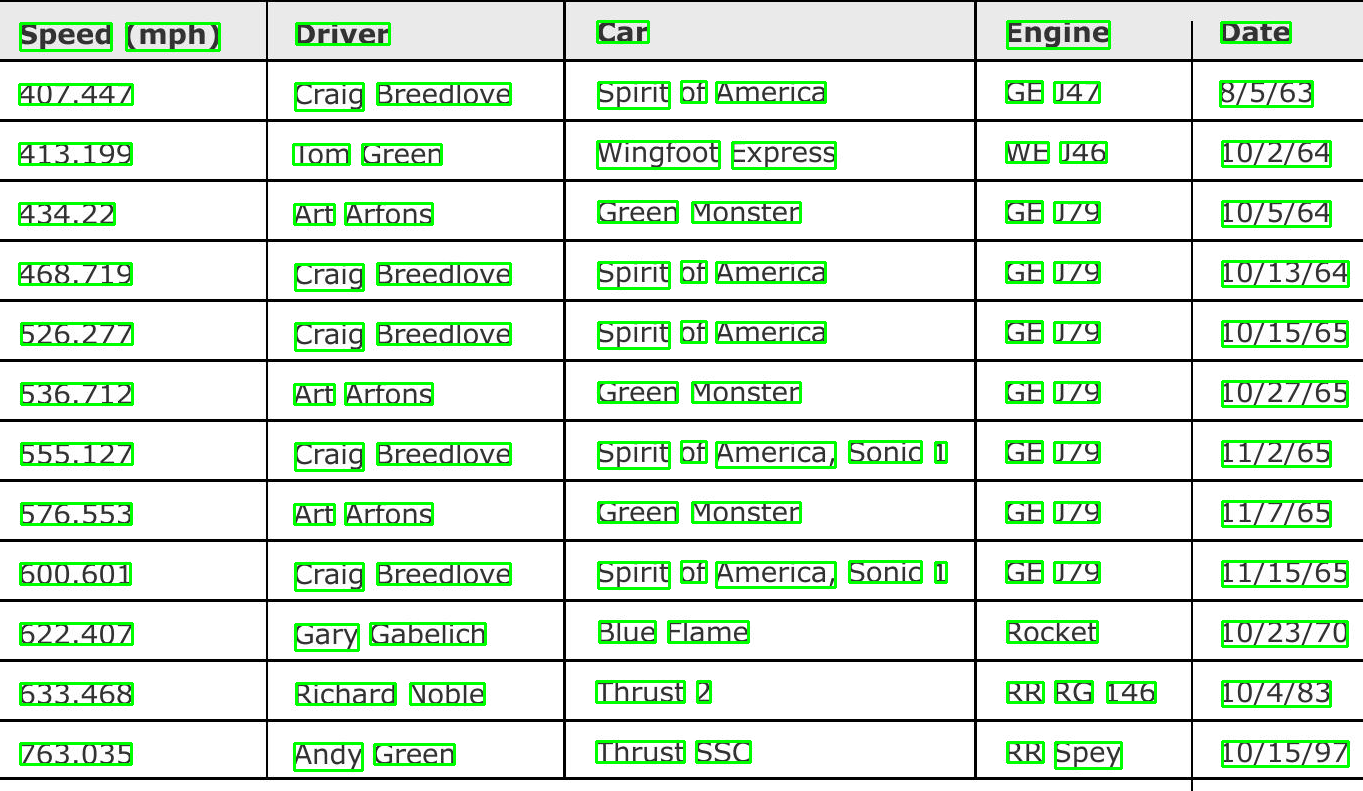

In [ ]:
import pytesseract
from pytesseract import Output
from google.colab.patches import cv2_imshow
import cv2
from PIL import Image
import numpy as np

all_cropped_images[1].save('/content/temp_image.png')
img = cv2.imread('/content/temp_image.png')
# Read the image using OpenCV
#img = cv2.imread('/content/drive/MyDrive/Screenshot 2024-07-22 155733.png')

# Convert the image to PIL format
pil_img = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Save the image as TIFF format
tiff_path = '/content/temp.tiff'
pil_img.save(tiff_path)

# Read the TIFF image using OpenCV
tiff_img = cv2.imread(tiff_path)

# Perform OCR using PyTesseract
custom_config = r'--oem 3 --psm 3'
d = pytesseract.image_to_data(tiff_img, output_type=Output.DICT, config=custom_config)

n_boxes = len(d['level'])

for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])

    if d['text'][i].strip():
        cv2.rectangle(tiff_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        print(f"Word: {d['text'][i]}")
        print(f"Bounding Box: (x: {x}, y: {y}, w: {w}, h: {h})")

cv2_imshow(tiff_img)


In [ ]:
for table in final_all_tables:
    for row in table:
        print(table[row])

['Number of Coils', 'Number of Paperclips']
['5', '3,5,4']
['10', '7, 8,6']
['15', '11, 10, 12']
['20', '| 15, 13, 14']
['Speed (mph)', 'Driver', 'Car', 'Engine', 'Date']
['407.447', 'Craig Breedlove', 'Spirit of America', 'GE J47', '8/5/63']
['413.199', 'Tom Green', 'Wingfoot Express', 'WE J46', '10/2/64']
['434.22', 'Art Arfons', 'Green Monster', 'GE J79', '10/5/64']
['468.719', 'Craig Breedlove', 'Spirit of America', 'GE J79', '10/13/64']
['526.2//', 'Craig Breedlove', 'Spirit of America', 'GE J79', '10/15/65']
['536.712', 'Art Arfons', 'Green Monster', 'GE J79', '10/27/65']
['555.127', 'Craig Breedlove', 'Spirit of America, Sonic 1', 'GE J79', '11/2/65']
['576.553', 'Art Arfons', 'Green Monster', 'GE J79', '11/7/65']
['600.601', 'Craig Breedlove', 'Spirit of America, Sonic 1', 'GE J79', '11/15/65']
['622.407', 'Gary Gabelich', 'Blue Flame', 'Rocket', '10/23/70']
['633.468', 'Richard Noble', 'Thrust 2', 'RR RG 146', '10/4/83']
['763.035', 'Andy Green', '| Thrust SSC', '| RR Spey', '

In [ ]:
# Function to create row-wise strings for each table
def create_rowwise_strings(tables):
    rowwise_strings = []
    for table in tables:
        table_strings = []
        for row_index in sorted(table.keys()):
            row = table[row_index]
            row_string = ', '.join(row)
            table_strings.append(row_string)
        rowwise_strings.append(table_strings)
    return rowwise_strings

# Get the row-wise strings for each table
rowwise_strings = create_rowwise_strings(final_all_tables)

# Print the result
for i, table_strings in enumerate(rowwise_strings):
    print(f"Table {i+1}:")
    for row_string in table_strings:
        print(row_string)
    print()  # Add a blank line between tables

# Output the list of row-wise strings for each table
print(rowwise_strings)

Table 1:
Number of Coils, Number of Paperclips
5, 3,5,4
10, 7, 8,6
15, 11, 10, 12
20, | 15, 13, 14

Table 2:
Speed (mph), Driver, Car, Engine, Date
407.447, Craig Breedlove, Spirit of America, GE J47, 8/5/63
413.199, Tom Green, Wingfoot Express, WE J46, 10/2/64
434.22, Art Arfons, Green Monster, GE J79, 10/5/64
468.719, Craig Breedlove, Spirit of America, GE J79, 10/13/64
526.2//, Craig Breedlove, Spirit of America, GE J79, 10/15/65
536.712, Art Arfons, Green Monster, GE J79, 10/27/65
555.127, Craig Breedlove, Spirit of America, Sonic 1, GE J79, 11/2/65
576.553, Art Arfons, Green Monster, GE J79, 11/7/65
600.601, Craig Breedlove, Spirit of America, Sonic 1, GE J79, 11/15/65
622.407, Gary Gabelich, Blue Flame, Rocket, 10/23/70
633.468, Richard Noble, Thrust 2, RR RG 146, 10/4/83
763.035, Andy Green, | Thrust SSC, | RR Spey, | 10/15/97

Table 3:
Time (drops of water) |, Distance (cm)
rr rn 0, 10,11,9
a ae |, 29, 31, 30
BY, 59, 58, 61
a ne |, 102, 100, 98
5, 122, 125, 127

[['Number of Co

In [ ]:
Final_extracted_words = []

# Assuming rowwise_strings and table_bbox have corresponding entries
for bbox, table_strings in zip(table_bbox, rowwise_strings):
    page_number = bbox['page']
    extracted_words = []
    for row_string in table_strings:
        words = row_string.replace(',', ' ').split()
        extracted_words.append(words)
    Final_extracted_words.append([page_number, extracted_words ])

print(Final_extracted_words)

[[1, [['Number', 'of', 'Coils', 'Number', 'of', 'Paperclips'], ['5', '3', '5', '4'], ['10', '7', '8', '6'], ['15', '11', '10', '12'], ['20', '|', '15', '13', '14']]], [2, [['Speed', '(mph)', 'Driver', 'Car', 'Engine', 'Date'], ['407.447', 'Craig', 'Breedlove', 'Spirit', 'of', 'America', 'GE', 'J47', '8/5/63'], ['413.199', 'Tom', 'Green', 'Wingfoot', 'Express', 'WE', 'J46', '10/2/64'], ['434.22', 'Art', 'Arfons', 'Green', 'Monster', 'GE', 'J79', '10/5/64'], ['468.719', 'Craig', 'Breedlove', 'Spirit', 'of', 'America', 'GE', 'J79', '10/13/64'], ['526.2//', 'Craig', 'Breedlove', 'Spirit', 'of', 'America', 'GE', 'J79', '10/15/65'], ['536.712', 'Art', 'Arfons', 'Green', 'Monster', 'GE', 'J79', '10/27/65'], ['555.127', 'Craig', 'Breedlove', 'Spirit', 'of', 'America', 'Sonic', '1', 'GE', 'J79', '11/2/65'], ['576.553', 'Art', 'Arfons', 'Green', 'Monster', 'GE', 'J79', '11/7/65'], ['600.601', 'Craig', 'Breedlove', 'Spirit', 'of', 'America', 'Sonic', '1', 'GE', 'J79', '11/15/65'], ['622.407', 'Ga

In [ ]:
for page_number, page_result in Pdftotext_result:
    print(f"Page {page_number}:")
    for line_data in page_result:
        print(line_data)

Page 1:
{'words': ['NATIONAL', 'PARTNERSHIP', 'FOR', 'QUALITY', 'AFTERSCHOOL', 'LEARNING'], 'bounding_box': {'xMin': 114.583333, 'xMax': 855.308835, 'yMin': 105, 'yMax': 135}}
{'words': ['www.sedl.org/afterschool/toolkits'], 'bounding_box': {'xMin': 112.5, 'xMax': 500.341667, 'yMin': 135, 'yMax': 160}}
{'words': ['�����������', '��������', '�������'], 'bounding_box': {'xMin': 113.541779, 'xMax': 631.375018, 'yMin': 180, 'yMax': 210}}
{'words': ['Tutoring', 'to', 'Enhance', 'Science', 'Skills'], 'bounding_box': {'xMin': 112.5, 'xMax': 675.5625, 'yMin': 225, 'yMax': 260}}
{'words': ['Tutoring', 'Two:', 'Learning', 'to', 'Make', 'Data', 'Tables'], 'bounding_box': {'xMin': 112.5, 'xMax': 710.702917, 'yMin': 260, 'yMax': 290}}
{'words': ['..............................................................................................'], 'bounding_box': {'xMin': 112.5, 'xMax': 1165.0, 'yMin': 280, 'yMax': 315}}
{'words': ['Sample', 'Data', 'for', 'Data', 'Tables'], 'bounding_box': {'xMin': 110

In [ ]:
def get_match_percentage(word_list, line_words):
    match_count = sum(1 for word in word_list if word in line_words)
    return (match_count / len(line_words)) * 100

def combine_bounding_boxes(bboxes):
    x_min = min(bbox['xMin'] for bbox in bboxes)
    x_max = max(bbox['xMax'] for bbox in bboxes)
    y_min = min(bbox['yMin'] for bbox in bboxes)
    y_max = max(bbox['yMax'] for bbox in bboxes)
    return {'xMin': x_min, 'xMax': x_max, 'yMin': y_min, 'yMax': y_max}

def find_matching_bbox(row_list, result, page_number):
    best_match_bbox = None
    best_match_count = 0

    for line_data in result[page_number - 1][1]:
        line_words = line_data['words']
        match_count = 0
        for word in row_list:
            if word in line_words:
                match_count += 1

        match_percentage = (match_count / len(line_words)) * 100
        if match_percentage > best_match_count:
            best_match_count = match_percentage
            best_match_bbox = line_data['bounding_box']

        if best_match_count >= 80:
            break

    return best_match_bbox, best_match_count

def process_pages(Final_extracted_words, Pdftotext_result):
    dataset = []

    for table_index, page_data in enumerate(Final_extracted_words):
        page_number = page_data[0]
        result_lines = Pdftotext_result[page_number - 1][1]

        for row_index, row_list in enumerate(page_data[1]):
            bbox, match_score = find_matching_bbox(row_list, Pdftotext_result, page_number)
            if bbox and match_score == 100:
                dataset.append({
                    'page_number': page_number,
                    'table_number': table_index + 1,
                    'row_number': row_index + 1,
                    'row_list': row_list,
                    'bounding_box': bbox
                })

    return dataset

matching_dataset = process_pages(Final_extracted_words, Pdftotext_result)

for data in matching_dataset:
    print(f"Page {data['page_number']}, Table {data['table_number']}, Row {data['row_number']}: {data['row_list']} with BBox {data['bounding_box']}")


Page 1, Table 1, Row 1: ['Number', 'of', 'Coils', 'Number', 'of', 'Paperclips'] with BBox {'xMin': 251.5775, 'xMax': 755.382542, 'yMin': 800, 'yMax': 825}
Page 1, Table 1, Row 2: ['5', '3', '5', '4'] with BBox {'xMin': 315.911646, 'xMax': 643.71875, 'yMin': 835, 'yMax': 860}
Page 1, Table 1, Row 3: ['10', '7', '8', '6'] with BBox {'xMin': 302.781583, 'xMax': 644.291646, 'yMin': 875, 'yMax': 900}
Page 1, Table 1, Row 4: ['15', '11', '10', '12'] with BBox {'xMin': 302.781583, 'xMax': 683.041646, 'yMin': 915, 'yMax': 940}
Page 1, Table 1, Row 5: ['20', '|', '15', '13', '14'] with BBox {'xMin': 302.781583, 'xMax': 683.041646, 'yMin': 950, 'yMax': 975}
Page 2, Table 2, Row 1: ['Speed', '(mph)', 'Driver', 'Car', 'Engine', 'Date'] with BBox {'xMin': 137.5, 'xMax': 1092.041667, 'yMin': 415, 'yMax': 440}
Page 2, Table 2, Row 2: ['407.447', 'Craig', 'Breedlove', 'Spirit', 'of', 'America', 'GE', 'J47', '8/5/63'] with BBox {'xMin': 137.5, 'xMax': 1109.416667, 'yMin': 460, 'yMax': 485}
Page 2, Tabl

In [ ]:
def find_first_unique_word(matching_dataset):
    unique_words_data = []
    tables_processed = set()

    for table in matching_dataset:
        page_number = table['page_number']
        table_number = table['table_number']

        # Skip tables already processed
        if table_number in tables_processed:
            continue

        row_words = table['row_list'
        ]
        row_number = table['row_number']
        row_bbox = table['bounding_box']
        word_counts = {}

        # Count the occurrences of each word in the row
        for word in row_words:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1

        # Find the unique word in the row
        unique_word_found = False
        for word, count in word_counts.items():
            if count == 1:
                unique_words_data.append({
                    'unique_word': word,
                    'table_number': table_number,
                    'page_number': page_number,
                    'row_number': row_number,
                    'bounding_box': row_bbox
                })
                tables_processed.add(table_number)
                unique_word_found = True
                break

        if unique_word_found:
            continue

    return unique_words_data

unique_words_dataset = find_first_unique_word(matching_dataset)

for data in unique_words_dataset:
    print(f"Unique Word: {data['unique_word']}, Table {data['table_number']}, Page {data['page_number']}, Row {data['row_number']}, BBox {data['bounding_box']}")


Unique Word: Coils, Table 1, Page 1, Row 1, BBox {'xMin': 251.5775, 'xMax': 755.382542, 'yMin': 800, 'yMax': 825}
Unique Word: Speed, Table 2, Page 2, Row 1, BBox {'xMin': 137.5, 'xMax': 1092.041667, 'yMin': 415, 'yMax': 440}
Unique Word: Time, Table 3, Page 2, Row 1, BBox {'xMin': 277.880854, 'xMax': 775.255854, 'yMin': 1230, 'yMax': 1255}


In [ ]:
def is_bbox_inside(inner_bbox, outer_bbox):
    return (
        inner_bbox['xMin'] >= outer_bbox['xMin'] - 5 and
        inner_bbox['xMax'] <= outer_bbox['xMax'] + 5 and
        inner_bbox['yMin'] >= outer_bbox['yMin'] - 5 and
        inner_bbox['yMax'] <= outer_bbox['yMax'] + 5
    )

def find_words_in_bounding_boxes(unique_words_data, pages_word_data_list):
    results = []

    for unique_word_data in unique_words_data:
        unique_word = unique_word_data['unique_word']
        page_number = unique_word_data['page_number']
        unique_bbox = unique_word_data['bounding_box']
        unique_table_number = unique_word_data['table_number']

        for page_data in pages_word_data_list:
            if page_data[0] == page_number:
                for word_data in page_data[1]:
                    word_bbox = word_data['bounding_box']

                    if (
                        word_data['word_text'] == unique_word and
                        is_bbox_inside(word_bbox, unique_bbox)
                    ):
                        results.append({
                            'word_text': word_data['word_text'],
                            'bounding_box': word_data['bounding_box'],
                            'page_number': page_number,
                            'table_number': unique_table_number
                        })
                        break

    return results

# Find words in bounding boxes
results1 = find_words_in_bounding_boxes(unique_words_dataset, pages_word_data_list)

# Print the results
for result in results1:
    print(f"Word: {result['word_text']}, Page: {result['page_number']},table:{result['table_number']}, BBox: {result['bounding_box']}")


Word: Coils, Page: 1,table:1, BBox: {'xMin': 381.160833, 'xMax': 436.723333, 'yMin': 799.106542, 'yMax': 824.273208}
Word: Speed, Page: 2,table:2, BBox: {'xMin': 137.5, 'xMax': 209.083333, 'yMin': 415.439854, 'yMax': 440.606521}
Word: Time, Page: 2,table:3, BBox: {'xMin': 277.880854, 'xMax': 334.776687, 'yMin': 1228.856542, 'yMax': 1254.023208}


In [ ]:
# Extract bounding boxes for the specified table and row numbers
extracted_bboxes = []

for data in unique_words_dataset:
    table_number = data['table_number'] - 1  # Adjust for zero-based index
    row_number = data['row_number'] - 1  # Adjust for zero-based index
    word_to_find = data['unique_word']

    if table_number < len(final_table_bounding_boxes):
        table_data = final_table_bounding_boxes[table_number]
        if row_number in table_data:
            row_data = table_data[row_number]
            for word_data in row_data:
                if word_data and word_data['word'] == word_to_find:
                    extracted_bboxes.append({
                        'word': word_to_find,
                        'table': data['table_number'],
                        'row': data['row_number'],
                        'bounding_box': {
                            'xMin': word_data['xmin'],
                            'xMax': word_data['xmax'],
                            'yMin': word_data['ymin'],
                            'yMax': word_data['ymax']
                        }
                    })

# Print results
for bbox in extracted_bboxes:
    print(f"Word: {bbox['word']}, Table: {bbox['table']}, Row: {bbox['row']}, BBox: {bbox['bounding_box']}")

Word: Coils, Table: 1, Row: 1, BBox: {'xMin': 181, 'xMax': 253, 'yMin': 17, 'yMax': 38}
Word: Speed, Table: 2, Row: 1, BBox: {'xMin': 20, 'xMax': 111, 'yMin': 23, 'yMax': 50}
Word: Time, Table: 3, Row: 1, BBox: {'xMin': 5, 'xMax': 79, 'yMin': 9, 'yMax': 30}


In [ ]:
def coordinate_scalar(x1, x2, x1_prime, x2_prime):
    A = np.array([[x1, 1], [x2, 1]])
    B = np.array([x1_prime, x2_prime])
    x = np.linalg.solve(A, B)
    return x

# Example usage
x1 = 799
x2 = 824
x1_prime = 17
x2_prime = 38

result = coordinate_scalar(x1, x2, x1_prime, x2_prime)
print(result)

[   0.84 -654.16]


In [ ]:
print(extracted_bboxes)
print(results1)

[{'word': 'Coils', 'table': 1, 'row': 1, 'bounding_box': {'xMin': 181, 'xMax': 253, 'yMin': 17, 'yMax': 38}}, {'word': 'Speed', 'table': 2, 'row': 1, 'bounding_box': {'xMin': 20, 'xMax': 111, 'yMin': 23, 'yMax': 50}}, {'word': 'Time', 'table': 3, 'row': 1, 'bounding_box': {'xMin': 5, 'xMax': 79, 'yMin': 9, 'yMax': 30}}]
[{'word_text': 'Coils', 'bounding_box': {'xMin': 381.160833, 'xMax': 436.723333, 'yMin': 799.106542, 'yMax': 824.273208}, 'page_number': 1, 'table_number': 1}, {'word_text': 'Speed', 'bounding_box': {'xMin': 137.5, 'xMax': 209.083333, 'yMin': 415.439854, 'yMax': 440.606521}, 'page_number': 2, 'table_number': 2}, {'word_text': 'Time', 'bounding_box': {'xMin': 277.880854, 'xMax': 334.776687, 'yMin': 1228.856542, 'yMax': 1254.023208}, 'page_number': 2, 'table_number': 3}]


In [ ]:
def calculate_transformation_parameters(extracted_bboxes, results1):
    transformation_params = {}

    for i in range(len(extracted_bboxes)):
        target = extracted_bboxes[i]['bounding_box']
        source = results1[i]['bounding_box']
        page = results1[i]['page_number']
        table = extracted_bboxes[i]['table']

        x1, x2 = source['xMin'], source['xMax']
        x1_prime, x2_prime = target['xMin'], target['xMax']
        a_x, b_x = coordinate_scalar(x1, x2, x1_prime, x2_prime)

        y1, y2 = source['yMin'], source['yMax']
        y1_prime, y2_prime = target['yMin'], target['yMax']
        a_y, b_y = coordinate_scalar(y1, y2, y1_prime, y2_prime)

        transformation_params[table] = {
            'a_x': a_x, 'b_x': b_x,
            'a_y': a_y, 'b_y': b_y,
            'page_number': page
        }

    return transformation_params

In [ ]:
transformation_params = calculate_transformation_parameters(extracted_bboxes, results1)

for table, params in transformation_params.items():
    print(f"Table {table}:")
    print(f"  a_x: {params['a_x']}, b_x: {params['b_x']}")
    print(f"  a_y: {params['a_y']}, b_y: {params['b_y']}")
    print(f"  page_number: {params['page_number']}")


Table 1:
  a_x: 1.2958380202474695, b_x: -312.9226992305964
  a_y: 0.8344371081970123, b_y: -649.8041520477944
  page_number: 1
Table 2:
  a_x: 1.2712456403783265, b_x: -154.79627555201986
  a_y: 1.0728476679093035, b_y: -422.70367852048156
  page_number: 2
Table 3:
  a_x: 1.3006224902270085, b_x: -356.41808831588776
  a_y: 0.8344371081970052, b_y: -1016.4034992954518
  page_number: 2


In [ ]:
for page_number, page_word_data in pages_word_data_list:
    print(f"Page {page_number}:")
    for word_data in page_word_data:
        print(word_data)

Page 1:
{'word_text': 'NATIONAL', 'bounding_box': {'xMin': 114.583333, 'xMax': 233.919463, 'yMin': 107.106521, 'yMax': 134.789854}}
{'word_text': 'PARTNERSHIP', 'bounding_box': {'xMin': 239.941957, 'xMax': 402.074918, 'yMin': 107.106521, 'yMax': 134.789854}}
{'word_text': 'FOR', 'bounding_box': {'xMin': 408.097412, 'xMax': 454.132365, 'yMin': 107.106521, 'yMax': 134.789854}}
{'word_text': 'QUALITY', 'bounding_box': {'xMin': 460.154859, 'xMax': 561.011007, 'yMin': 107.106521, 'yMax': 134.789854}}
{'word_text': 'AFTERSCHOOL', 'bounding_box': {'xMin': 567.033501, 'xMax': 730.610211, 'yMin': 107.106521, 'yMax': 134.789854}}
{'word_text': 'LEARNING', 'bounding_box': {'xMin': 736.632705, 'xMax': 855.308835, 'yMin': 107.106521, 'yMax': 134.789854}}
{'word_text': 'www.sedl.org/afterschool/toolkits', 'bounding_box': {'xMin': 112.5, 'xMax': 500.341667, 'yMin': 134.189854, 'yMax': 161.850271}}
{'word_text': '�����������', 'bounding_box': {'xMin': 113.541779, 'xMax': 327.571171, 'yMin': 177.876878

In [ ]:
def scale_coordinates(word_data, params):
    x_min = word_data['bounding_box']['xMin']
    x_max = word_data['bounding_box']['xMax']
    y_min = word_data['bounding_box']['yMin']
    y_max = word_data['bounding_box']['yMax']

    new_x_min = x_min * params['a_x'] + params['b_x']
    new_x_max = x_max * params['a_x'] + params['b_x']
    new_y_min = y_min * params['a_y'] + params['b_y']
    new_y_max = y_max * params['a_y'] + params['b_y']

    return {
        'word_text': word_data['word_text'],
        'bounding_box': {
            'xMin': new_x_min,
            'xMax': new_x_max,
            'yMin': new_y_min,
            'yMax': new_y_max
        }
    }

In [ ]:
scaled_pages_word_data_list = []

for page_number, page_word_data in pages_word_data_list:
    # Iterate over each table's transformation parameters
    for table, params in transformation_params.items():
        if params['page_number'] == page_number:  # Ensure the table is on the current page
            scaled_page_word_data = []
            for word_data in page_word_data:
                x_min = word_data['bounding_box']['xMin']
                x_max = word_data['bounding_box']['xMax']
                y_min = word_data['bounding_box']['yMin']
                y_max = word_data['bounding_box']['yMax']

                # Apply the transformation parameters for the current table
                a_x = params['a_x']
                b_x = params['b_x']
                a_y = params['a_y']
                b_y = params['b_y']

                scaled_x_min = a_x * x_min + b_x
                scaled_x_max = a_x * x_max + b_x
                scaled_y_min = a_y * y_min + b_y
                scaled_y_max = a_y * y_max + b_y

                scaled_word_data = {
                    'word_text': word_data['word_text'],
                    'bounding_box': {
                        'xMin': scaled_x_min,
                        'xMax': scaled_x_max,
                        'yMin': scaled_y_min,
                        'yMax': scaled_y_max
                    }
                }

                scaled_page_word_data.append(scaled_word_data)

            scaled_pages_word_data_list.append([page_number, table, scaled_page_word_data])

# Print the scaled results
for page_number, table, scaled_page_word_data in scaled_pages_word_data_list:
    print(f"Page {page_number}, Table {table}:")
    for scaled_word_data in scaled_page_word_data:
        print(scaled_word_data)

Page 1, Table 1:
{'word_text': 'NATIONAL', 'bounding_box': {'xMin': -164.44125984251986, 'xMax': -9.80096539932515, 'yMin': -560.4304963955119, 'yMax': -537.330496061737}}
{'word_text': 'PARTNERSHIP', 'bounding_box': {'xMin': -1.99678869741291, 'xMax': 208.10126650168735, 'yMin': -560.4304963955119, 'yMax': -537.330496061737}}
{'word_text': 'FOR', 'bounding_box': {'xMin': 215.90544320359953, 'xMax': 275.5592855613049, 'yMin': -560.4304963955119, 'yMax': -537.330496061737}}
{'word_text': 'QUALITY', 'bounding_box': {'xMin': 283.36346226321706, 'xMax': 414.05669341732283, 'yMin': -560.4304963955119, 'yMax': -537.330496061737}}
{'word_text': 'AFTERSCHOOL', 'bounding_box': {'xMin': 421.86087011923513, 'xMax': 633.8297901642297, 'yMin': -560.4304963955119, 'yMax': -537.330496061737}}
{'word_text': 'LEARNING', 'bounding_box': {'xMin': 641.6339668661419, 'xMax': 795.4190082159732, 'yMin': -560.4304963955119, 'yMax': -537.330496061737}}
{'word_text': 'www.sedl.org/afterschool/toolkits', 'boundi

In [ ]:
def is_within_box(word_bbox, box):
    word_x_min = float(word_bbox['xMin']) # Convert to float
    word_y_min = float(word_bbox['yMin']) # Convert to float
    word_x_max = float(word_bbox['xMax']) # Convert to float
    word_y_max = float(word_bbox['yMax']) # Convert to float
    x_min, y_min, x_max, y_max = box
    return (word_x_min >= x_min -10 and word_x_max <= x_max + 10 and word_y_min >= y_min - 10 and word_y_max <= y_max + 10)

In [ ]:
boxes_with_words = []

for table_data in all_table_coordinates:
    table_id = table_data['ID'] + 1
    cell_coordinates = table_data['Coordinates']

    for page_number, table, scaled_page_word_data in scaled_pages_word_data_list:
        if table_id == table:
            table_box_val = []
            for row in cell_coordinates:
                for cell in row['cells']:
                    box = cell['cell']
                    words_in_box = [word['word_text'] for word in scaled_page_word_data if is_within_box(word['bounding_box'], box)]
                    box_dict = {
                        'bounding_box': box,
                        'words': words_in_box
                    }
                    table_box_val.append(box_dict)
            boxes_with_words.append({"table": table_id, "page_number": page_number, "Words_Bounding_box": table_box_val})

for box_data in boxes_with_words:
    print(f"Table number: {box_data['table']}, Page number: {box_data['page_number']}")
    for bbox in box_data['Words_Bounding_box']:
        print(f"Bounding_box: {bbox['bounding_box']}, Words: {bbox['words']}")
    print()


Table number: 1, Page number: 1
Bounding_box: [6.36, 10.14, 296.45, 51.2], Words: ['Number', 'of', 'Coils']
Bounding_box: [298.32, 10.14, 678.79, 51.2], Words: ['Number', 'of', 'Paperclips']
Bounding_box: [6.36, 51.13, 296.45, 103.3], Words: ['5', '10']
Bounding_box: [298.32, 51.13, 678.79, 103.3], Words: ['3,', '5,', '4', '7,', '8,', '6']
Bounding_box: [6.36, 103.36, 296.45, 153.51], Words: ['15']
Bounding_box: [298.32, 103.36, 678.79, 153.51], Words: ['11,', '10,', '12']
Bounding_box: [6.36, 153.09, 296.45, 203.79], Words: ['20']
Bounding_box: [298.32, 153.09, 678.79, 203.79], Words: ['15,', '13,', '14']
Bounding_box: [6.36, 203.99, 296.45, 245.61], Words: ['are', 'pH', 'values', 'of']
Bounding_box: [298.32, 203.99, 678.79, 245.61], Words: ['common', 'household']

Table number: 2, Page number: 2
Bounding_box: [15.1, 12.69, 254.13, 59.67], Words: ['Speed', '(mph)']
Bounding_box: [256.11, 12.69, 552.05, 59.67], Words: ['Driver']
Bounding_box: [552.79, 12.69, 977.51, 59.67], Words: ['Ca

# **Mapping using the Old Method**



In [ ]:
print(extracted_bboxes)
print(results1)

[{'word': 'Coils', 'table': 1, 'row': 1, 'bounding_box': {'xMin': 181, 'xMax': 253, 'yMin': 17, 'yMax': 38}}, {'word': 'Speed', 'table': 2, 'row': 1, 'bounding_box': {'xMin': 20, 'xMax': 111, 'yMin': 23, 'yMax': 50}}, {'word': 'Time', 'table': 3, 'row': 1, 'bounding_box': {'xMin': 5, 'xMax': 79, 'yMin': 9, 'yMax': 30}}]
[{'word_text': 'Coils', 'bounding_box': {'xMin': 381.160833, 'xMax': 436.723333, 'yMin': 799.106542, 'yMax': 824.273208}, 'page_number': 1, 'table_number': 1}, {'word_text': 'Speed', 'bounding_box': {'xMin': 137.5, 'xMax': 209.083333, 'yMin': 415.439854, 'yMax': 440.606521}, 'page_number': 2, 'table_number': 2}, {'word_text': 'Time', 'bounding_box': {'xMin': 277.880854, 'xMax': 334.776687, 'yMin': 1228.856542, 'yMax': 1254.023208}, 'page_number': 2, 'table_number': 3}]


In [ ]:
def scale_bbox(bbox, original_bbox, target_bbox):
    orig_x_min, orig_y_min, orig_x_max, orig_y_max = original_bbox
    target_x_min, target_y_min, target_x_max, target_y_max = target_bbox
    orig_width = orig_x_max - orig_x_min
    orig_height = orig_y_max - orig_y_min
    target_width = target_x_max - target_x_min
    target_height = target_y_max - target_y_min


    if orig_width == 0:
        x_scale = 0
    else:
        x_scale = target_width / orig_width

    if orig_height == 0:
        y_scale = 0
    else:
        y_scale = target_height / orig_height

    x_min = target_x_min + (bbox[0] - orig_x_min) * x_scale
    y_min = target_y_min + (bbox[1] - orig_y_min) * y_scale
    x_max = target_x_min + (bbox[2] - orig_x_min) * x_scale
    y_max = target_y_min + (bbox[3] - orig_y_min) * y_scale

    return [x_min, y_min, x_max, y_max]

In [ ]:
print(word_texthole_table_rowswise)
print(tables_bounding_dict)

In [ ]:
temp = scale_bbox([381.075033, 394.23828,  465.423585,  421.09375], [179.486083, 407.66601549999996, 948.4944665, 1519.8242195],[159.32999999999998, 34.845, 1187.49, 1506.23])
print(temp)
# [428.8533228650491, 17.080110925565336, 541.6268752541824, 52.60988907443473]

In [ ]:
scaled_bounding_boxes = {}

for table_number, table_data in tables_bounding_dict.items():
    page_number = table_data['page_number']
    original_bbox = table_data['bounding_box']

    if table_number in word_texthole_table_rowswise:
        target_bbox = word_texthole_table_rowswise[table_number]

        scaled_table_bboxes = []

        for page_data in pages_word_data_list:
            page_num, words_data = page_data
            if page_num == page_number:
                for word_data in words_data:
                    word_bbox = [
                        word_data['bounding_box']['xMin'],
                        word_data['bounding_box']['yMin'],
                        word_data['bounding_box']['xMax'],
                        word_data['bounding_box']['yMax']
                    ]

                    scaled_bbox = scale_bbox(word_bbox, original_bbox, target_bbox)

                    scaled_word_data = {
                        'word_text': word_data['word_text'],
                        'scaled_bounding_box': scaled_bbox
                    }

                    scaled_table_bboxes.append(scaled_word_data)

        scaled_bounding_boxes[table_number] = scaled_table_bboxes

for table_number, table_data in scaled_bounding_boxes.items():
    print(table_number, table_data)



In [ ]:
def is_within_box(word_bbox, box):
    word_x_min, word_y_min, word_x_max, word_y_max = word_bbox
    x_min, y_min, x_max, y_max = box
    return (word_x_min >= x_min - 5 and word_x_max <= x_max + 5 and word_y_min >= y_min - 5 and word_y_max <= y_max + 5)

In [ ]:
boxes_with_words = []

for table_data in all_table_coordinates:
    table_id = table_data['ID'] + 1
    cell_coordinates = table_data['Coordinates']

    if table_id in scaled_bounding_boxes:
        scaled_bboxes = scaled_bounding_boxes[table_id]
        table_box_val = []
        for row in cell_coordinates:
            for cell in row['cells']:
                box = cell['cell']
                words_in_box = [word['word_text'] for word in scaled_bboxes if is_within_box(word['scaled_bounding_box'], box)]
                box_dict = {
                    'bounding_box': box,
                    'words': words_in_box
                }
                table_box_val.append(box_dict)
        boxes_with_words.append({"table":table_id,"Words_Bounding_box":table_box_val})


for box_data in boxes_with_words:
    print(f"table number: {box_data['table']}")
    print(f"Bounding_boxes: {box_data['Words_Bounding_box']}\n")


In [ ]:
# !pdftotext -r 150 -bbox-layout /content/table_2.pdf datatable_example.html

In [ ]:
# from bs4 import BeautifulSoup

# # Read HTML content
# html_file = 'datatable_example.html'
# with open(html_file, 'r') as f:
#     html_content = f.read()

# # Parse HTML using BeautifulSoup
# soup = BeautifulSoup(html_content, 'html.parser')


In [ ]:
# # List to store dictionaries for each word
# word_data_list = []

# # Find all 'page' elements
# pages = soup.find_all('page')

# # Iterate over pages
# for page_number, page in enumerate(pages, start=1):
#     # Find all 'word' elements within the page
#     words = page.find_all('word')

#     # Iterate over words within the page
#     for word in words:
#         # Extract bounding box coordinates
#         x_min = float(word['xmin'])
#         x_max = float(word['xmax'])
#         y_min = float(word['ymin'])
#         y_max = float(word['ymax'])

#         # Extract word text
#         word_text = word.get_text().strip()

#         # Create a dictionary for the current word
#         word_data = {
#             'page_number': page_number,
#             'word_text': word_text,
#             'bounding_box': {
#                 'xMin': x_min,
#                 'xMax': x_max,
#                 'yMin': y_min,
#                 'yMax': y_max
#             }
#         }

#         # Append the dictionary to the list
#         word_data_list.append(word_data)

In [ ]:
# # Print the list of dictionaries
# for word_data in word_data_list:
#     print(word_data)